# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [107]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [109]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [110]:
# ! poetry show | grep matplotlib

In [111]:
# ! pip freeze | grep matplotlib

## Configuration

In [112]:
csv_file = settings.DATA_FOLDER /'house_prices_clean.csv'

In [113]:
df = pd.read_csv(csv_file)

df.shape

(29451, 14)

In [114]:
df.sample(5)

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
20611,0,1,3,"2,371.88",1,1,13.00,77.61,330.00,0,1,0,1,0
2524,0,0,2,"1,030.03",1,1,19.18,72.96,130.00,0,1,0,1,0
25258,0,0,2,"1,238.62",1,1,19.04,73.07,170.00,0,1,0,1,0
8431,1,1,1,651.47,0,1,24.69,78.42,100.00,0,1,0,1,0
24819,0,1,2,"1,014.30",1,1,19.12,72.88,100.00,0,1,0,1,0


In [132]:
df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK,square_ft_log,bhk_no_log
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,"19,802.17",0.82,0.93,21.30,76.84,142.90,0.02,0.62,0.36,1.00,0.00,7.09,1.19
std,0.38,0.47,0.88,"1,901,334.91",0.38,0.26,6.21,10.56,656.88,0.14,0.49,0.48,0.03,0.03,0.59,0.25
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25,0.00,0.00,0.00,0.00,0.00,1.39,0.69
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00,0.00,0.00,0.00,1.00,0.00,6.80,1.10
50%,0.00,0.00,2.00,"1,175.06",1.00,1.00,20.75,77.32,62.00,0.00,1.00,0.00,1.00,0.00,7.07,1.10
75%,0.00,1.00,3.00,"1,550.69",1.00,1.00,26.90,77.83,100.00,0.00,1.00,1.00,1.00,0.00,7.35,1.39
max,1.00,1.00,20.00,"254,545,454.50",1.00,1.00,59.91,152.96,"30,000.00",1.00,1.00,1.00,1.00,1.00,19.35,3.04


## EDA

In [115]:
df.isna().sum()

under_construction     0
rera                   0
bhk_no                 0
square_ft              0
ready_to_move          0
resale                 0
longitude              0
latitude               0
targetprice_in_lacs    0
posted_by_Builder      0
posted_by_Dealer       0
posted_by_Owner        0
bhk_or_rk_BHK          0
bhk_or_rk_RK           0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   under_construction   29451 non-null  int64  
 1   rera                 29451 non-null  int64  
 2   bhk_no               29451 non-null  int64  
 3   square_ft            29451 non-null  float64
 4   ready_to_move        29451 non-null  int64  
 5   resale               29451 non-null  int64  
 6   longitude            29451 non-null  float64
 7   latitude             29451 non-null  float64
 8   targetprice_in_lacs  29451 non-null  float64
 9   posted_by_Builder    29451 non-null  int64  
 10  posted_by_Dealer     29451 non-null  int64  
 11  posted_by_Owner      29451 non-null  int64  
 12  bhk_or_rk_BHK        29451 non-null  int64  
 13  bhk_or_rk_RK         29451 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 3.1 MB


In [117]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,"19,802.17",0.82,0.93,21.30,76.84,142.90,0.02,0.62,0.36,1.00,0.00
std,0.38,0.47,0.88,"1,901,334.91",0.38,0.26,6.21,10.56,656.88,0.14,0.49,0.48,0.03,0.03
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,2.00,"1,175.06",1.00,1.00,20.75,77.32,62.00,0.00,1.00,0.00,1.00,0.00
75%,0.00,1.00,3.00,"1,550.69",1.00,1.00,26.90,77.83,100.00,0.00,1.00,1.00,1.00,0.00
max,1.00,1.00,20.00,"254,545,454.50",1.00,1.00,59.91,152.96,"30,000.00",1.00,1.00,1.00,1.00,1.00


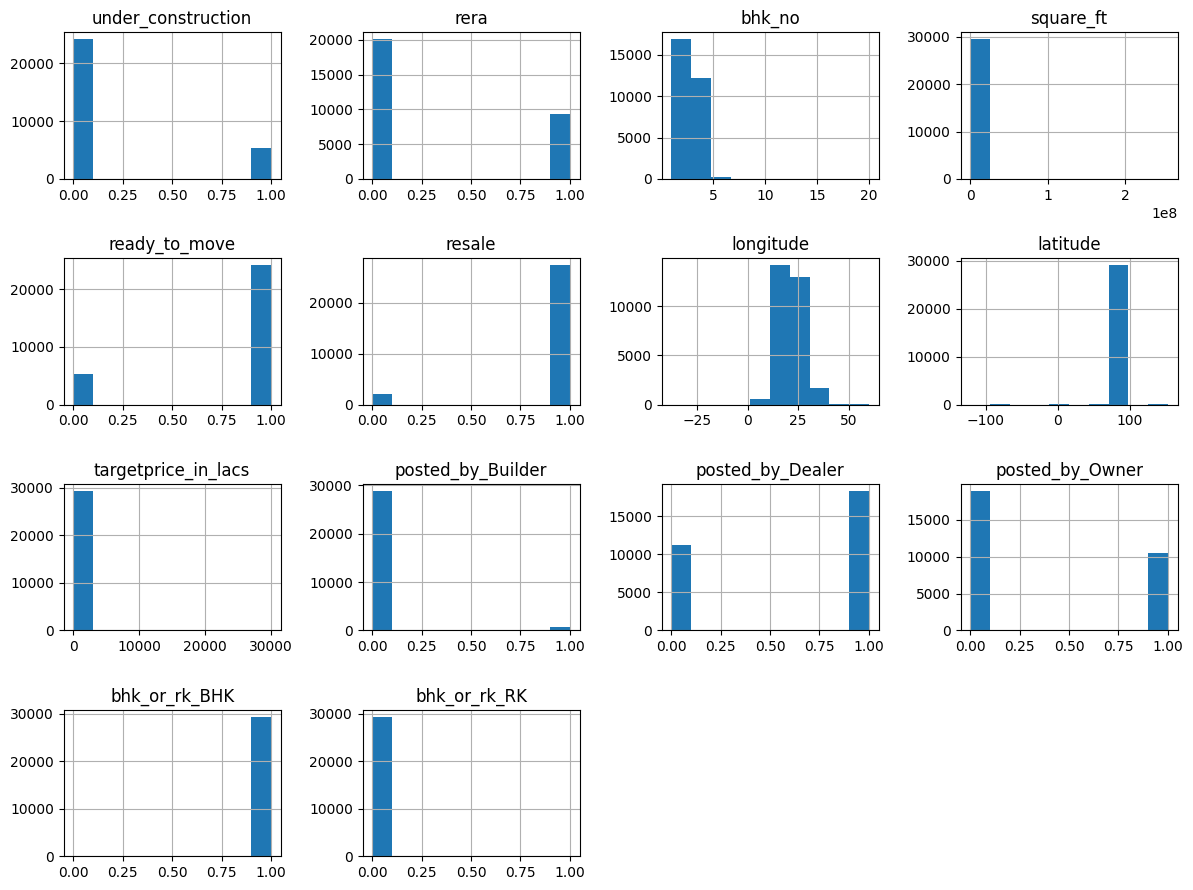

In [118]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/

<Axes: >

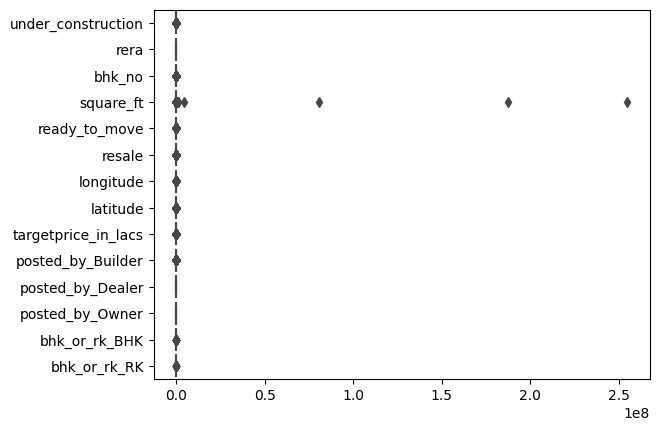

In [119]:
    sns.boxplot(data=df, orient='h')

### Categories

In [71]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

ValueError: could not convert string to float: 'Ksfc Layout,Bangalore'

<Figure size 2000x1000 with 0 Axes>

In [15]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.1
Seaborn   : 0.12.2
Matplotlib: 3.7.3


In [16]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os


In [120]:
df.corr()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
under_construction,1.00,0.36,-0.04,-0.00,-1.00,-0.35,0.01,-0.00,0.06,0.19,0.17,-0.23,-0.02,0.02
rera,0.36,1.00,0.01,-0.01,-0.36,-0.27,0.10,-0.07,0.07,0.11,0.24,-0.27,-0.01,0.01
bhk_no,-0.04,0.01,1.00,0.01,0.04,0.01,0.07,0.05,0.11,-0.02,0.09,-0.09,0.05,-0.05
square_ft,-0.00,-0.01,0.01,1.00,0.00,0.00,-0.01,0.00,0.40,-0.00,-0.01,0.01,0.00,-0.00
ready_to_move,-1.00,-0.36,0.04,0.00,1.00,0.35,-0.01,0.00,-0.06,-0.19,-0.17,0.23,0.02,-0.02
resale,-0.35,-0.27,0.01,0.00,0.35,1.00,0.02,0.01,-0.21,-0.53,-0.04,0.20,0.03,-0.03
longitude,0.01,0.10,0.07,-0.01,-0.01,0.02,1.00,-0.16,-0.03,-0.03,0.07,-0.06,-0.01,0.01
latitude,-0.00,-0.07,0.05,0.00,0.00,0.01,-0.16,1.00,-0.02,-0.00,-0.03,0.03,-0.00,0.00
targetprice_in_lacs,0.06,0.07,0.11,0.40,-0.06,-0.21,-0.03,-0.02,1.00,0.02,0.09,-0.09,0.00,-0.00
posted_by_Builder,0.19,0.11,-0.02,-0.00,-0.19,-0.53,-0.03,-0.00,0.02,1.00,-0.19,-0.11,-0.04,0.04


/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='square_ft', ylabel='Count'>

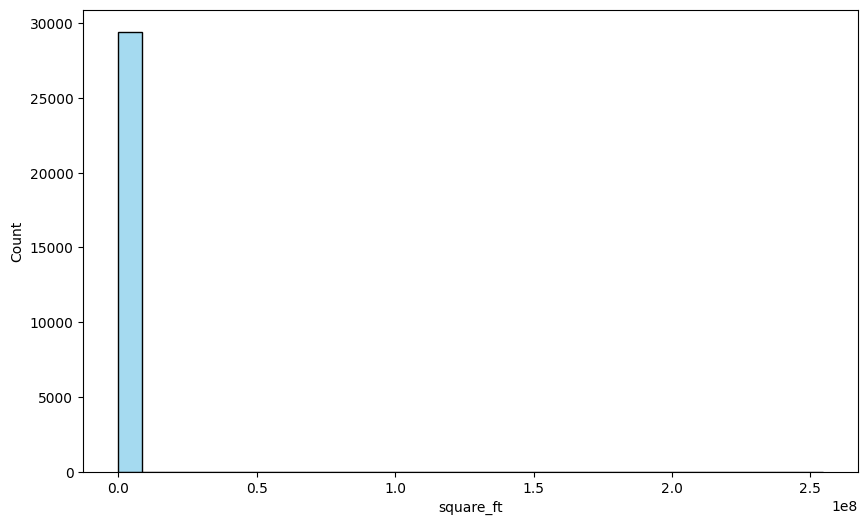

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(df['square_ft'], kde=False, bins=30, label='Histogram', color='skyblue', stat="count")

In [127]:
import numpy as np

df['square_ft_log'] = np.log(df['square_ft'] +1 )
df['bhk_no_log'] = np.log(df['bhk_no'] +1 )

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='square_ft_log', ylabel='Count'>

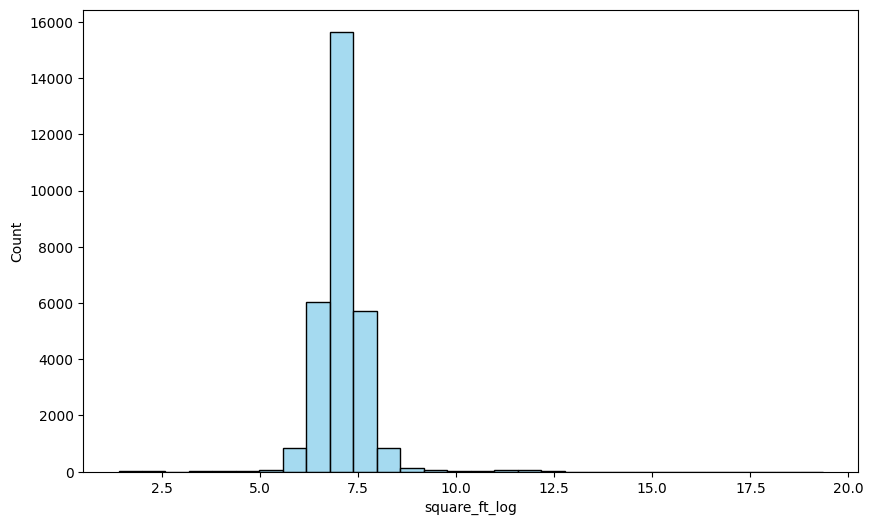

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(df['square_ft_log'], kde=False, bins=30, label='Histogram', color='skyblue', stat="count")

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bhk_no_log', ylabel='Count'>

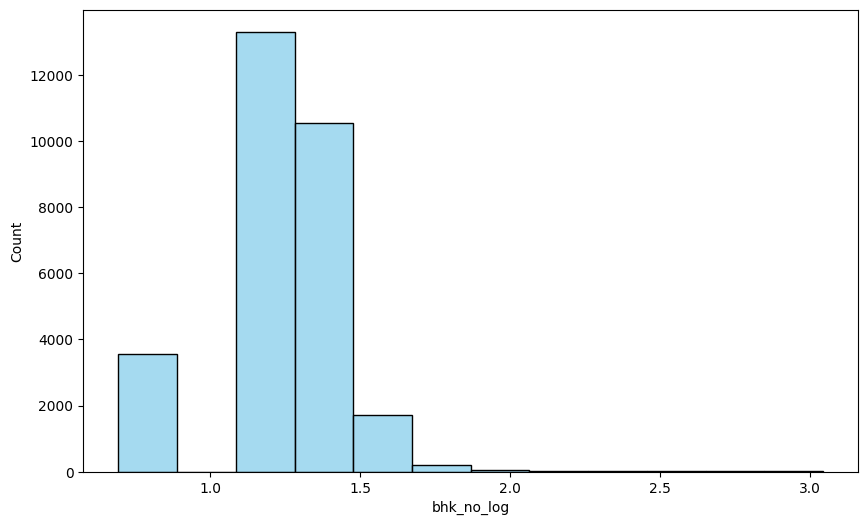

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bhk_no_log'], kde=False, bins=12, label='Histogram', color='skyblue', stat="count")

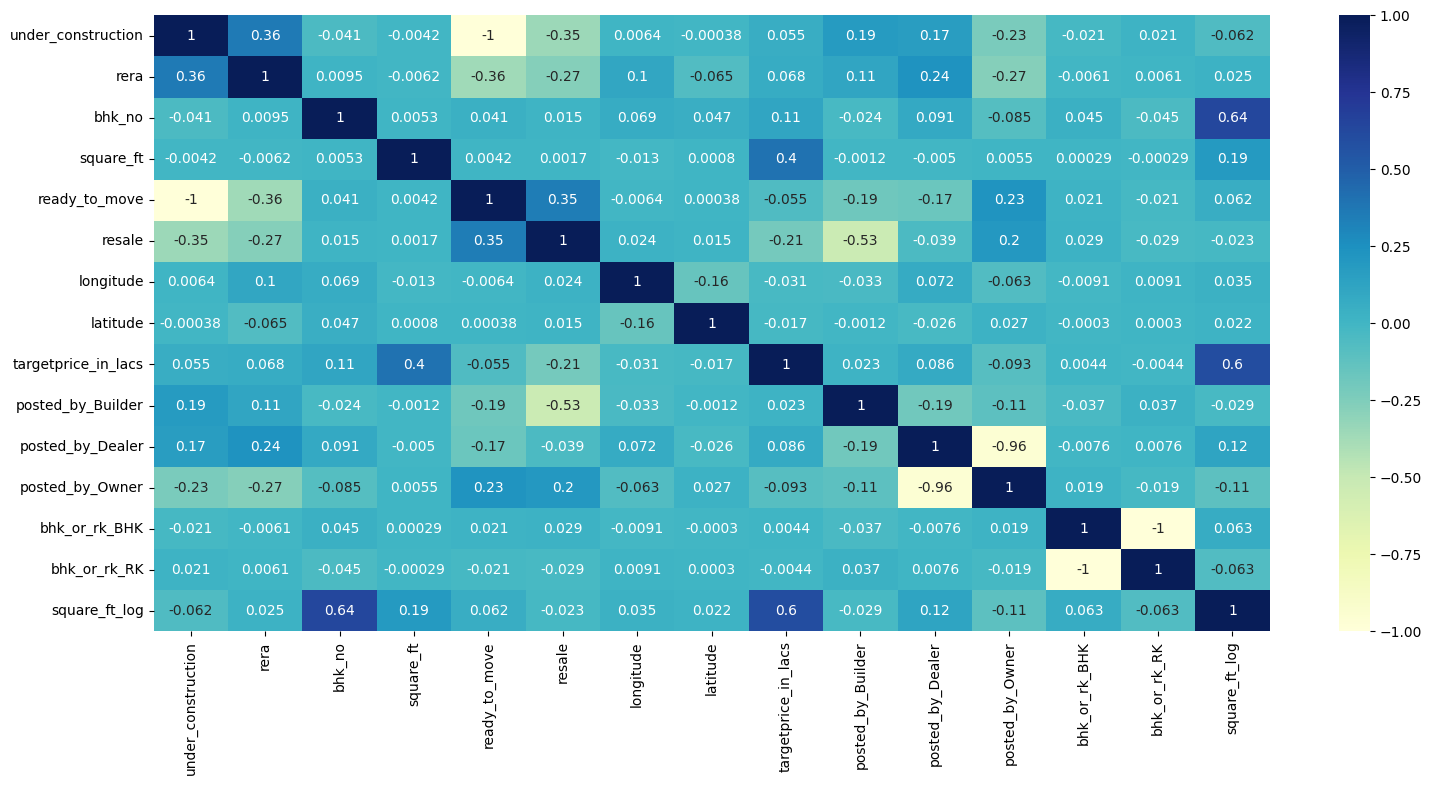

In [125]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()